# K Means Clustering

Online retail is a transational data set which contains all the transaction occuring between 1/12/2010 and 9/12/2011 for a 
UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## What we want to acheive?

Segment the Customers based on RFM so that the company can target its customers efficiently.

### R(Recency) : Number of days since last purchase
### F(Frequency) : Number of transactions
### M (Monetary) : Total amount of transactions(revenue contribution)

In [2]:
# Import required libraries for clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
import sklearn
from sklearn.cluster import KMeans

In [4]:

from sklearn.preprocessing import StandardScaler

In [6]:
retail = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1",header=0)

In [7]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
# shape of data frame
retail.shape

(541909, 8)

In [9]:
# data frame info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning

In [10]:
# Calculating the missing values % contribution in Data frame

df_null = round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [11]:
# Dropping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [12]:
# Changing the datatype of Customer Id

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [13]:
# New attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m  = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
# New attribute : Frequency


rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
# Merging the two dfs

rfm = pd.merge(rfm_m,rfm_f, on = 'CustomerID' , how = 'inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
# New attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [17]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
# Compute the difference between max_date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
# Compute recency of customer

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
# Exact number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [21]:
# Merge the data frames to get the final RFM dataframe

rfm = pd.merge(rfm,rfm_p, on= 'CustomerID', how = 'inner')
rfm.columns = ['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

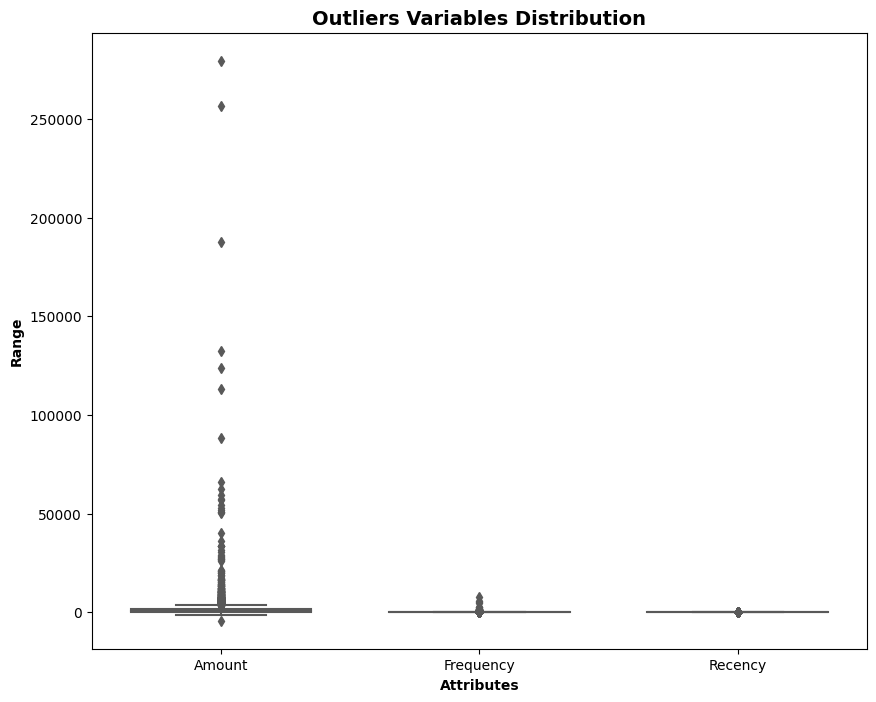

In [22]:
# Outlier Analysis Frequency and Recency 

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data =rfm[attributes],orient = "v",palette = "Set2" , whis = 1.5, saturation  = 1,width=0.7)
plt.title("Outliers Variables Distribution", fontsize = 14, fontweight= 'bold')
plt.ylabel("Range",fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [23]:
# Removing (statistical) outliers for Amount

Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for recency
Q1  = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical ) outliers for Frequency

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1-1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]


## Scaling the features

In [24]:
rfm_df = rfm[['Amount','Frequency','Recency']]

# Instantiate
scaler = StandardScaler()


# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [25]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Model Building


In [26]:
# k-means with some arbitrary k

Kmeans  = KMeans(n_clusters = 4,max_iter=50,n_init=10)
Kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, n_init=10)

In [27]:
Kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0])

In [28]:
set(Kmeans.labels_)

{0, 1, 2, 3}

## Elbow Curve to get the number of Clusters

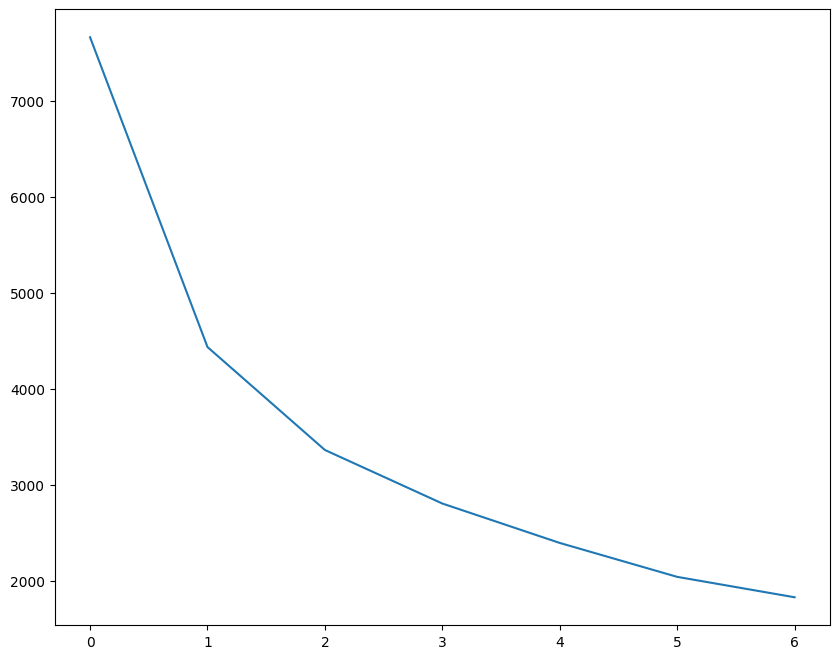

In [29]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    Kmeans = KMeans(n_clusters = num_clusters, max_iter = 50,n_init = 10)
    Kmeans.fit(rfm_df_scaled)
    
    ssd.append(Kmeans.inertia_)
# plot the ssds for each n_clusters
plt.plot(ssd)
    

## Final model with k = 3

In [39]:
kmeans = KMeans(n_clusters = 3,max_iter = 300,n_init = 10)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3, n_init=10)

In [40]:
# Define filename for pickle file
filename = 'kmeans_model.pkl'
import pickle

# Open filename in write mode
with open('kmeans_saved_model','wb') as file:
    # Save the kmeans model to the file
    pickle.dump(kmeans, file)
# Close the file
file.close()

pickle.dump(kmeans,open('kmeans_model.pkl','wb'))

In [31]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [32]:
#assign the tabel
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

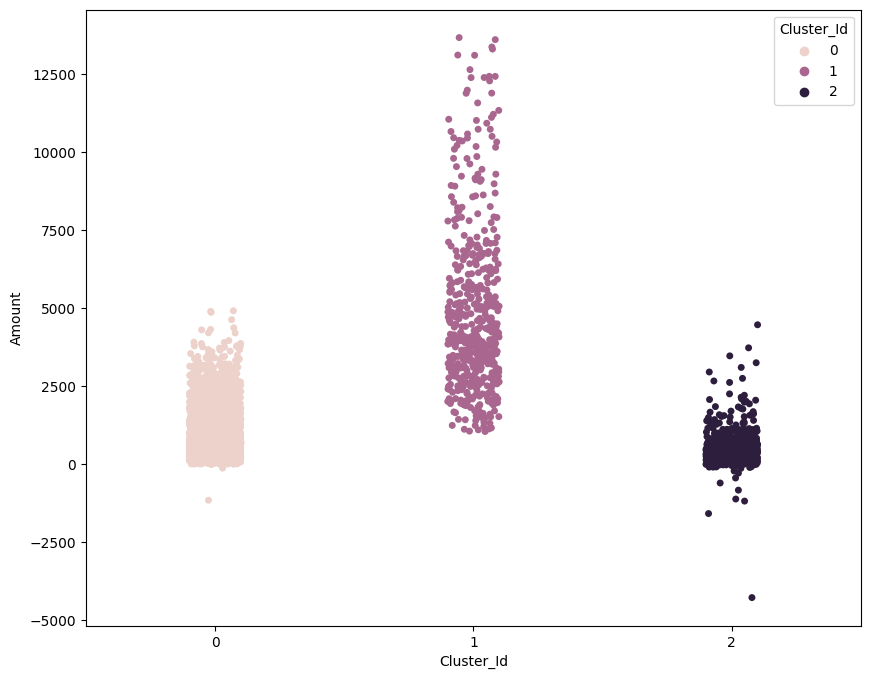

In [36]:
# Box plot to visualise Cluster Id vs Amount
sns.stripplot(x='Cluster_Id', y = 'Amount',data = rfm,hue = 'Cluster_Id')

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

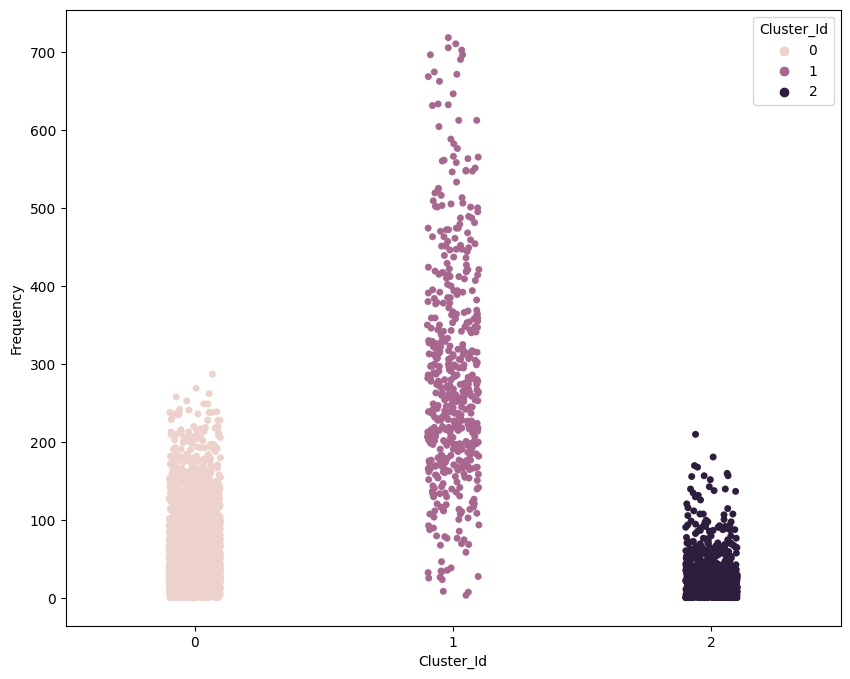

In [37]:
#Box plot to visualise cluster Id vs Frequency
sns.stripplot(x = 'Cluster_Id',y = 'Frequency',data = rfm,hue = 'Cluster_Id')

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

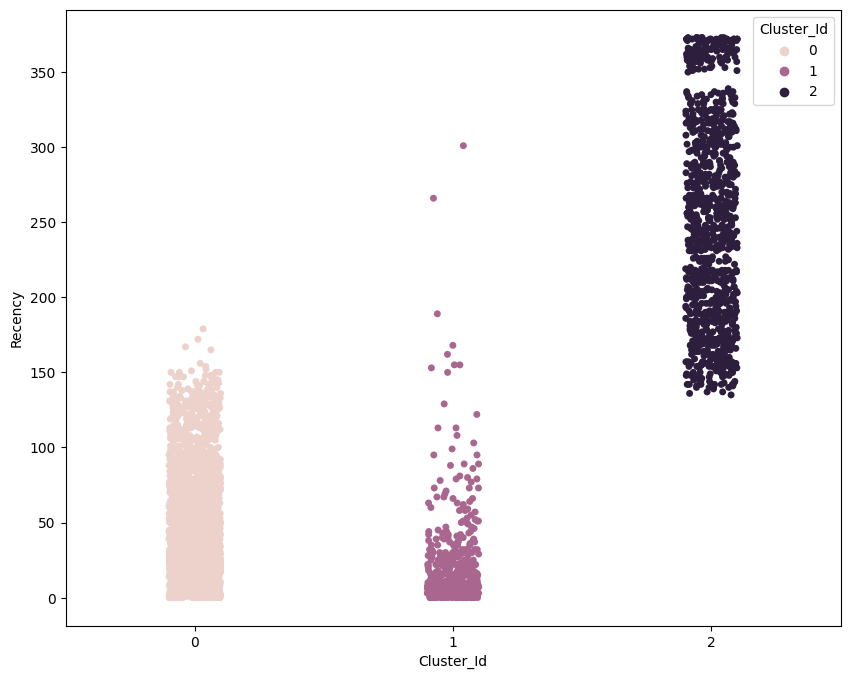

In [38]:
#Box plot to visualise Cluster Id vs Recency
sns.stripplot(x = 'Cluster_Id',y =  'Recency' ,data = rfm , hue = 'Cluster_Id')